<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210705%5D_Polynomial_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial regression

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://towardsdatascience.com/machine-learning-basics-polynomial-regression-3f9dd30223d1

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [3]:
# Upload CSV From a local drive
from google.colab import files
uploaded = files.upload()

Saving AEa.csv to AEa.csv


In [5]:
dataset= pd.read_csv('AEa.csv')

In [13]:
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, -1].values
dataset.head(5)

,ppm,A,Ea
0,0,152055.4,21994.10
1,400,193493.7,22268.31
2,800,238947.7,22514.70
3,1000,262498.3,22625.97
4,1200,286645.1,22729.29


In [14]:
X

array([[   0],
       [ 400],
       [ 800],
       [1000],
       [1200],
       [1600],
       [2000],
       [2500]])

In [10]:
y

array([21994.1 , 22268.31, 22514.7 , 22625.97, 22729.29, 22916.07,
       23084.97, 23273.73])

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
X_poly

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 4.00000e+02, 1.60000e+05, 6.40000e+07, 2.56000e+10],
       [1.00000e+00, 8.00000e+02, 6.40000e+05, 5.12000e+08, 4.09600e+11],
       [1.00000e+00, 1.00000e+03, 1.00000e+06, 1.00000e+09, 1.00000e+12],
       [1.00000e+00, 1.20000e+03, 1.44000e+06, 1.72800e+09, 2.07360e+12],
       [1.00000e+00, 1.60000e+03, 2.56000e+06, 4.09600e+09, 6.55360e+12],
       [1.00000e+00, 2.00000e+03, 4.00000e+06, 8.00000e+09, 1.60000e+13],
       [1.00000e+00, 2.50000e+03, 6.25000e+06, 1.56250e+10, 3.90625e+13]])

In [16]:
y_pred = lin_reg.predict(X_poly)

In [17]:
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,21994.10,21993.873368
1,22268.31,22269.137878
2,22514.70,22514.132529
3,22625.97,22625.315813
4,22729.29,22729.283003
5,22916.07,22917.469257
6,23084.97,23084.025516
7,23273.73,23273.902635


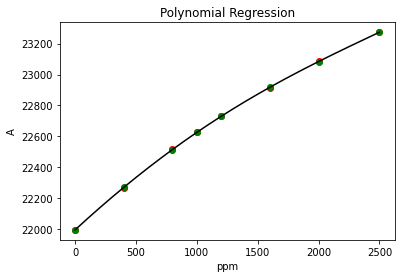

In [19]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(X, y_pred, color = 'green')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('ppm')
plt.ylabel('A')
plt.show()